<a href="https://colab.research.google.com/github/dsmondo/mul_lectures/blob/main/ML_240214.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import lightgbm
lightgbm.__version__

'4.3.0'

# 데이터 불러오기

In [ ]:
import pandas as pd

titanic_df = pd.read_csv("data/titanic_train.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 데이터 확인

In [ ]:
print(type(titanic_df))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
print(titanic_df.shape)

(891, 12)


In [ ]:
# 컬럼별 결측치 확인
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
temp = titanic_df['Pclass'].value_counts() # Series 객체
temp.index
# temp.values

Int64Index([3, 1, 2], dtype='int64')

In [ ]:
titanic_df['Cabin'].value_counts(dropna=False) # 결측치 확인

NaN            687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

## numpy, list, dictionary와 DataFrame 상호변환 가능

In [ ]:
# to_numpy() ==> 굳이 필요x
titanic_df.values # numpy로 변환
titanic_df.values.tolist() # list로 변환
# titanic_df.to_dict('list') # dict로 변환

[[1,
  0,
  3,
  'Braund, Mr. Owen Harris',
  'male',
  22.0,
  1,
  0,
  'A/5 21171',
  7.25,
  nan,
  'S'],
 [2,
  1,
  1,
  'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
  'female',
  38.0,
  1,
  0,
  'PC 17599',
  71.2833,
  'C85',
  'C'],
 [3,
  1,
  3,
  'Heikkinen, Miss. Laina',
  'female',
  26.0,
  0,
  0,
  'STON/O2. 3101282',
  7.925,
  nan,
  'S'],
 [4,
  1,
  1,
  'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
  'female',
  35.0,
  1,
  0,
  '113803',
  53.1,
  'C123',
  'S'],
 [5,
  0,
  3,
  'Allen, Mr. William Henry',
  'male',
  35.0,
  0,
  0,
  '373450',
  8.05,
  nan,
  'S'],
 [6, 0, 3, 'Moran, Mr. James', 'male', nan, 0, 0, '330877', 8.4583, nan, 'Q'],
 [7,
  0,
  1,
  'McCarthy, Mr. Timothy J',
  'male',
  54.0,
  0,
  0,
  '17463',
  51.8625,
  'E46',
  'S'],
 [8,
  0,
  3,
  'Palsson, Master. Gosta Leonard',
  'male',
  2.0,
  3,
  1,
  '349909',
  21.075,
  nan,
  'S'],
 [9,
  1,
  3,
  'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
  'female',

## DataFrame의 컬럼 dataset 생성,수정
- data['새로운컬럼명'] = 연산

## DataFrame 삭제
- axis=1 (컬럼)
- axis=0 (행 인덱스)
- inplace=True, 객체를 저장하면서 업데이트
- temp2 = temp...

## set_option()
- streamlit 활용해서 깔끔하게 테이블 보여주고 싶을때, 활용가치 O
- data_editor()

## Data selection & Filtering
- .loc 문법만 잘 기억해도 됨
- keyError ==> 해당 df의 컬럼명이 현재 없는 상태 or Dictionary의 Key값이 존재하지 않는 상태

## 결손데이터 처리하기
- Missing Data

In [ ]:
titanic_df.isna().head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False


In [ ]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## fillna()로 결손데이터 대체하기

In [ ]:
# OR use inplace=True
titanic_df['Cabin'] = titanic_df['Cabin'].fillna('C000')
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')
titanic_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
# 하드코딩 외에 인덱스 활용
titanic_df['Embarked'].value_counts().index[0]

'S'

In [ ]:
titanic_df['Embarked'].mode()[0] # 최빈값 활용

'S'

## apply, lambda식으로 데이터 가공
- 1회성 사용자 정의 함수

In [ ]:
def get_square(a):
    return a**2

print(get_square(3))

9


In [ ]:
lambda_square = lambda x : x ** 2
lambda_square(5)

25

In [ ]:
a = [1,2,3,4,5,6]
squares = map(lambda x : x**2, a)
list(squares)

[1, 4, 9, 16, 25, 36]

In [ ]:
# Map함수 대신 apply 메서드 사용
titanic_df['Name_len'] = titanic_df['Name'].apply(lambda x : len(x))
titanic_df[['Name_len', 'Name']].head(3)

,Name_len,Name
0,23,"Braund, Mr. Owen Harris"
1,51,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,22,"Heikkinen, Miss. Laina"


## apply()
- 행 단위로 연산할 때 사용 (구지 반복문 사용x)
  + lambda : 간단한 연산을 할 때
  + udf (User Defined Function): if 조건절이 여러번 사용될 것 같은 상황이면 udf 사용

In [ ]:
def get_category(age):
    cat = ''
    if age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'

    return cat

In [ ]:
titanic_df['Age_Cat'] = titanic_df['Age'].apply(lambda x : get_category(x))

In [ ]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_len,Age_Cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C000,S,23,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,51,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C000,S,22,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,44,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C000,S,24,Young Adult


## Scikit-learn (핵심)
- Python 머신러닝 라이브러리
- 엑셀 데이터 ==> 정형 데이터 ==> 머신러닝 디폴트 라이브러리
    + 비정형 데이터 ==> 텐서플로, 케라스, 파이토치 딥러닝 전문 라이브러리
    + 이미지 (비디오), 자연어 (텍스트 데이터)
- Other ML packages follow scikit-laern style API
  + XGBoost, LightGBM, CatBoost => not scikit-learn algorithm
  + XGBoost, LightGBM, CatBoost => 마치 사이킷런 클래스처럼 사용이 가능하도록 지원

- 가장 큰 단점
  + GPU 연산을 못함 / CPU 연산만 함

In [ ]:
import sklearn

sklearn.__version__

'1.2.2'

### Iris Species Prediction
- 3가지 중 한개를 예측

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd # DataFrame 생성 목적

iris = load_iris() # numpy 배열로 데이터가 존재함

# 독립변수 = 설명변수
iris_data = iris.data # 2차원 numpy 배열

# 지도학습 = 종속변수
iris_label = iris.target
print(type(iris_data))
iris_label
iris

<class 'numpy.ndarray'>


{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## Point to think
- 종속변수가 문자 ==> 숫자로 변환!

In [ ]:
iris_df = pd.DataFrame(data=iris_data, columns = iris.feature_names) # 독립변수의 컬럼명
iris_df['label'] = iris.target
iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


## Train data, Test data Split
- 정석 : train, validation, test

In [ ]:
# X_train : 훈련데이터 독립변수
# X_test : 테스트데이터 독립변수
# y_train : 훈련데이터 종속변수
# y_test : 테스트데이터 종속변수

# iris_data : 전체데이터 독립변수
# iris_label : 전체데이터 종속변수

X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=11)

## Model Training
- DecisionTreeClassifier 객체 생성

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=11)

# 학습 수행
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=11, splitter='best')

## Prediction
- 테스트 데이터 세트로 예측 수행

In [ ]:
# test data로 예측 수행
pred = dt_clf.predict(X_test)
pred

array([2, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9333


In [ ]:
y_test # 예측결과와 비교 용도

array([2, 2, 2, 1, 2, 0, 1, 0, 0, 1, 2, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 1])

## Scikit learn 코드 형식
- sklearn.pipeline 방식대로 작성 강력추천
  + 공식문서에서 매우 권장하는 사항

## Model Selection 모듈 소개

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
dt_clf = DecisionTreeClassifier()
train_data = iris.data
train_label = iris.target
dt_clf.fit(train_data, train_label)

# 학습 데이터 셋으로 예측 수행
pred = dt_clf.predict(train_data)
print('예측 정확도:',accuracy_score(train_label,pred))

예측 정확도: 1.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

dt_clf = DecisionTreeClassifier( )
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size=0.3, random_state=121)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9556


### K-fold Cross Validation
- k=5개인 경우 5번의 모델 학습
  + 훈련데이터와 검증데이터의 샘플은 각각 다르다!
  + 평가 5번, 평균을 뽑는 것이 목적

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성.
kfold = KFold(n_splits=5)
cv_accuracy = []
print('붓꽃 데이터 세트 크기:',features.shape[0])

붓꽃 데이터 세트 크기: 150


In [ ]:
n_iter = 0
# KFold객체의 split( ) 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
for train_index, test_index  in kfold.split(features):
    # kfold.split( )으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    #학습 및 예측
    dt_clf.fit(X_train , y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1
    # 반복 시 마다 정확도 측정
    accuracy = np.round(accuracy_score(y_test,pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)

# 개별 iteration별 정확도를 합하여 평균 정확도 계산
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도 :1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도 :0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도 :0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도 :0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도 :0.7333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.9


## ML 과정
- 데이터 수집
- 데이터셋 분리
  + Sampling Error in Stats
- 모델 불러오기
- 모델 학습
- 모델 평가

### Stratified K-fold
- 종속변수가 불균형한(imbalanced) 분포도를 가진 데이터 집합
  + 코로나 데이터 (양성/음성)
  + 검사 10만명, 양성판정은 적고 / 대부분 다 음성 판정
    + 음성 80%, 양성 20% 추출

In [ ]:
import pandas as pd
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label']=iris.target
iris_df['label'].value_counts()
kfold = KFold(n_splits=3)
# kfold.split(X)는 폴드 세트를 3번 반복할 때마다 달라지는 학습/테스트 용 데이터 로우 인덱스 번호 반환.
n_iter =0
for train_index, test_index  in kfold.split(iris_df):
    n_iter += 1
    label_train= iris_df['label'].iloc[train_index]
    label_test= iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())


## 교차 검증: 1
학습 레이블 데이터 분포:
 1    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    50
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 0    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    50
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 0    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    50
Name: label, dtype: int64


In [ ]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter=0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
    n_iter += 1
    label_train= iris_df['label'].iloc[train_index]
    label_test= iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:
 2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
1    17
2    16
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
2    17
1    16
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    17
2    17
0    16
Name: label, dtype: int64


### 모델의 일반화
- 모델을 안정적으로 개발함

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=156)
skfold = StratifiedKFold(n_splits=3)
n_iter=0
cv_accuracy=[]
# StratifiedKFold의 split( ) 호출시 반드시 레이블 데이터 셋도 추가 입력 필요
for train_index, test_index  in skfold.split(features, label):
    # split( )으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    #학습 및 예측
    dt_clf.fit(X_train , y_train)
    pred = dt_clf.predict(X_test)
    # 반복 시 마다 정확도 측정
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test,pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)

# 교차 검증별 정확도 및 평균 정확도 계산
print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도:', np.round(np.mean(cv_accuracy), 4))


#1 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도 :0.94, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0.98 0.94 0.98]
## 평균 검증 정확도: 0.9667


[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


[Text(0.4, 0.9, 'x[3] <= 0.8\ngini = 0.665\nsamples = 112\nvalue = [37, 34, 41]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.5, 0.7, 'x[2] <= 4.95\ngini = 0.496\nsamples = 75\nvalue = [0, 34, 41]'),
 Text(0.2, 0.5, 'x[3] <= 1.65\ngini = 0.153\nsamples = 36\nvalue = [0, 33, 3]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.3, 0.3, 'x[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5, 'x[3] <= 1.75\ngini = 0.05\nsamples = 39\nvalue = [0, 1, 38]'),
 Text(0.7, 0.3, 'x[3] <= 1.65\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 35\nvalue = [0, 0, 35]')]

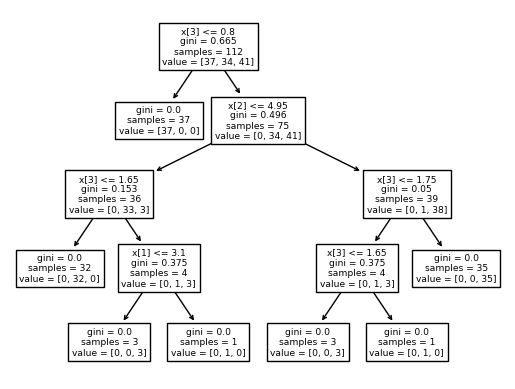

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 데이터 불러오기
iris = load_iris()

# 데이터 가공
X = iris.data # 독립변수 가져오는 코드
y = iris.target # 종속변수 가져오는 코드

# 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 모델링
# max_depth만 잘써도 충분
clf = DecisionTreeClassifier(max_depth = 5, random_state=0) # 디폴트 모델

# 모델 학습
clf.fit(X_train, y_train)

# 예측 데이터 생성
pred = clf.predict(X_test)
print(pred)

# 평가지표
accuracy_score(y_test, pred)

tree.plot_tree(clf)

## Grid Search vs Random Search 차이점, 최근 trend
    + 베이지안 서치
    + optuna
    + scikit-optimize

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 데이터를 로딩하고 학습데이타와 테스트 데이터 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier()

# 파라미터 딕셔너리 형태로 설정
parameters = {'max_depth':[1,2,3],
              'min_samples_split':[2,3]}

In [ ]:
import pandas as pd

# Grid Search
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True) # refit=True: 가장 좋은 파라미터 설정으로 재학습시킴

grid_dtree.fit(X_train, y_train)

scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008907,0.009408,0.003184,0.003078,1,2,"{'max_depth': 1, 'min_samples_split': 2}",0.700,0.7,0.70,0.700000,1.110223e-16,5
1,0.006184,0.005908,0.001841,0.001316,1,3,"{'max_depth': 1, 'min_samples_split': 3}",0.700,0.7,0.70,0.700000,1.110223e-16,5
2,0.003600,0.000443,0.002523,0.000395,2,2,"{'max_depth': 2, 'min_samples_split': 2}",0.925,1.0,0.95,0.958333,3.118048e-02,3
3,0.006708,0.005279,0.002495,0.000684,2,3,"{'max_depth': 2, 'min_samples_split': 3}",0.925,1.0,0.95,0.958333,3.118048e-02,3
4,0.002525,0.002194,0.001551,0.000422,3,2,"{'max_depth': 3, 'min_samples_split': 2}",0.975,1.0,0.95,0.975000,2.041241e-02,1
5,0.002675,0.002014,0.005415,0.005528,3,3,"{'max_depth': 3, 'min_samples_split': 3}",0.975,1.0,0.95,0.975000,2.041241e-02,1


In [ ]:
# 최적의 파라미터
grid_dtree.best_params_

{'max_depth': 3, 'min_samples_split': 2}

In [ ]:
grid_dtree.best_score_

0.975

In [ ]:
# 예측
estimator = grid_dtree.best_estimator_ #재학습
estimator

DecisionTreeClassifier(max_depth=3)

## 데이터 전처리 (Feature Engineering)
- 데이터 가공 : Raw data를 적절히 변환
  + 쓰지않을 컬럼 삭제
  + 행 추출 (조건문 부여, 이상치 제거)
  + 파생변수
        
- Feature Engineering
  + 인코딩 변환 (문자컬럼 -> 숫자)
  + Feature Scaling(숫자컬럼을 적절하게 표준화, 정규화)
  + 주성분분석(PCA) (숫자 컬럼을 적절하게 줄여주는 역할, 차원축소)
  + 요인분석(Factor Analysis) (숫자,문자컬럼을 적절하게 줄여주는 역할)


In [ ]:
from sklearn.preprocessing import LabelEncoder

items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

# LabelEncoder 객체생성, fit, transform으로 label 인코딩 수행 # 가나다순 정렬
# 종속변수에 적용
# 수치예측할 때 사용 X
# 범주예측: 예시, 양성/음성/기타
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
labels

array([0, 1, 4, 5, 3, 3, 2, 2])

In [ ]:
encoder.classes_

array(['TV', '냉장고', '믹서', '선풍기', '전자레인지', '컴퓨터'], dtype='<U5')

In [ ]:
encoder.inverse_transform([4,5,2])

array(['전자레인지', '컴퓨터', '믹서'], dtype='<U5')

## Label Encoder
- 몇몇 ML알고리즘에는 적용 곤란
  + 회귀계열 알고리즘, 서포트벡터머신...
- 트리계열 알고리즘에는 상관없다!

## One-Hot Encoding
- 문자를 숫자로 변경, Label Encoding과의 차이점
- 문제점: 학습시간 오래걸리고, 성능 느려짐

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

# 2차원 ndarray로 변환
items = np.array(items).reshape(-1, 1)
print(items.shape)

# One-Hot Encoding 적용
oh_encoder = OneHotEncoder()
oh_encoder.fit(items)
oh_labels = oh_encoder.transform(items)
oh_labels.toarray()

(8, 1)


array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

In [ ]:
df = pd.DataFrame({'item':['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


## 피처 스케일링과 정규화
- 기본값으로 무조건 사용
  + ML 알고리즘 상관없이, 디폴트로 사용
- 수치 데이터, 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업
  + 판매데이터
    - 광고투입비용(원), 온도, 판매량, 매출액
    - in Tree계열 알고리즘
      + 굳이 scaling, 정규화 필요 X
    - SVM, KNN, 베이지안, 회귀 등 알고리즘 ==> Scaling 꼭 필요

### StandardScaler

- 평균이 0, 분산이 1인 값으로 변환해준다
  + 표준정규분포

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
# 붓꽃 데이터 셋을 로딩하고 DataFrame으로 변환합니다.
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())
# print(iris_df)

feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


### StandardScaler 객체 생성
- 각 피처, 수치형 컬럼, 한번에 표준화

In [ ]:
from sklearn.preprocessing import StandardScaler

# 객체 생성
scaler = StandardScaler()

scaler.fit(iris_df) # 수치데이터만 모아놓음
iris_scaled = scaler.transform(iris_df)
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
iris_df_scaled
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


## MinMaxScaler
- 데이터 분포가 정규분포가 아닐 경우
- 수치 데이터를 0~1사이 범위 값으로 변환
  + 만약, 음수 존재하면 -1에서 1값으로 변환

### EDA
- 수치 데이터 정밀하게 다 분류를 해야 함: standardScaler, minmaxScaler, robustScaler, absMaxScaler
- 범주 데이터 정밀하게 다 분류를 해야 함: Ordinal Encoding, Label Encoding, One-Hot Encoding

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())

feature 들의 평균 값
sepal length (cm)    0.428704
sepal width (cm)     0.440556
petal length (cm)    0.467458
petal width (cm)     0.458056
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.052908
sepal width (cm)     0.032983
petal length (cm)    0.089522
petal width (cm)     0.100869
dtype: float64
